# LinearRegression with scikit learn

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Code
```python
from sklearn.linear_model import LinearRegression
model = LinearRegression(<parameters>)
model.fit(X, y)
y_new = model.predict(X_test)
```

[Official Reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

## Parameters
- `fit_intercept`: whether to calculate the intercept or not  
(solving `X@v + b*ones = y` or `X@v = y`) 

## Attributes
- `coef_`: an array of shape `(n_features,)` for the best-fitting solution of `v` in `X@v + b*ones = y` or `X@v = y`
- `intercept_`: the best-fitting solution of `b` in `X@v + b*ones = y`  
If `fit_intercept=False`, then `intercept_` is 0.
- `rank_`: the rank of `X`  
- `singular_`: singular values of `X`

## Sample data

##### Exercise 1
Let  
```python
x = np.arange(10)
y = 0.5*x + 3 + 0.3*np.random.randn(10)
X = x[:,np.newaxis]
x_test = np.linspace(0,10,20)
X_test = x_test[:,np.newaxis]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_new = model.predict(X_test)
```

###### 1(a)
Use `plt.scatter` to plot the points with `x` and `y` .  
Use `plt.plot( ..., c='r')` to plot the line with `x_test` and `y_new` .  
Print `model.coef_` and  `model.intercept_` .  
Can you guess these two numbers by the definition of `y` ?

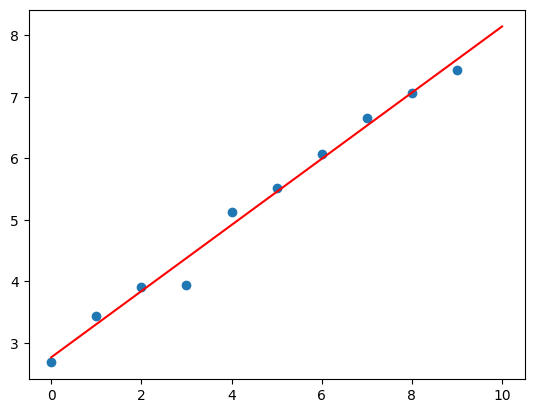

Coefficients: [0.53838894]
Intercept: 2.762636538054955


In [ ]:
### your answer here
x = np.arange(10)
y = 0.5*x + 3 + 0.3*np.random.randn(10)
X = x[:,np.newaxis]
x_test = np.linspace(0,10,20)
X_test = x_test[:,np.newaxis]

model = LinearRegression()
model.fit(X, y)
y_new = model.predict(X_test)

plt.scatter(x, y)
plt.plot(x_test, y_new, c='r')
plt.show()

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

###### 1(b)
Redo 1(a) with the setting `fit_intercept=False` .

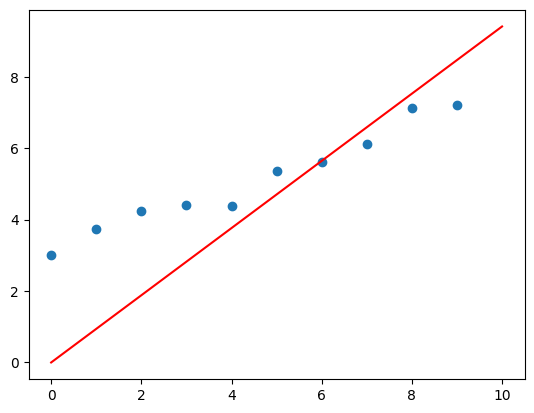

Coefficients: [0.94083796]
Intercept: 0.0


In [ ]:
### your answer here
x = np.arange(10)
y = 0.5*x + 3 + 0.3*np.random.randn(10)
X = x[:,np.newaxis]
x_test = np.linspace(0,10,20)
X_test = x_test[:,np.newaxis]

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_new = model.predict(X_test)

plt.scatter(x, y)
plt.plot(x_test, y_new, c='r')
plt.show()

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

##### Exercise 2
Let  
```python
c = 100 * np.random.rand(100)
f = 1.8*c + 32 + 5*np.random.randn(100)
```
be a collection of temperature data of 100 days,  
where `c` stores them in Celsius and  
`f` stores them in Fahrenheit.  
Suppose you knows nothing about their conversion.  
How would you guess their relation?

In [ ]:
### your answer here

# Generate random temperature data
c = 100 * np.random.rand(100)
f = 1.8 * c + 32 + 5 * np.random.randn(100)

# Convert the Celsius data to a 2D array
X = c.reshape(-1, 1)

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, f)

# Print the slope and intercept of the regression line
print('Slope:', model.coef_[0])
print('Intercept:', model.intercept_)

Slope: 1.804227199063866
Intercept: 31.94884132351089


##### Exercise 3
Let  
```python
from PIL import Image
img = Image.open('incrediville-side.jpg')
img_grey = img.convert('L')
arr = np.array(img)
m,n,c = arr.shape
X = arr.reshape(-1,3)
y = np.array(img_grey).ravel()
```
For each pixel in the picture, `X` stores its colors in `(R,G,B)` and `y` is its greyscale brightness.  
Suppose the conversion formula is `Greyscale = ?*R + ?*G + ?*B` .  
Can you guess the coefficients?

In [ ]:
### your answer here
from PIL import Image
img = Image.open('incrediville-side.jpg')
img_grey = img.convert('L')
arr = np.array(img)
m,n,c = arr.shape
X = arr.reshape(-1,3)
y = np.array(img_grey).ravel()

model_img = LinearRegression()
model_img.fit(X,y)

print("The coefficient is ",model_img.coef_)

The coefficient is  [0.2987386  0.58625368 0.11423304]


## Experiments

##### Exercise 4
Let  
```python
x = np.arange(10)
y = 0.5*x + 3 + 0.3*np.random.randn(10)
X = x[:,np.newaxis]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_new = model.predict(X)
```

###### 4(a)
Compute the mean of the square differences between `y` and `y_new` .  
Compare your answer with  
```python
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_new)
```

In [ ]:
### your answer here
from sklearn.metrics import mean_squared_error
# Generate some random data
x = np.arange(10)
y = 0.5*x + 3 + 0.3*np.random.randn(10)
X = x[:,np.newaxis]

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)
y_new = model.predict(X)

# Compute the mean squared error between y and y_new
diff_squared = (y - y_new)**2
mean_diff_squared = np.mean(diff_squared)
print(mean_diff_squared)

mse = mean_squared_error(y, y_new)
print(mse)

0.02792826300523025
0.02792826300523025


###### 4(b)
Compute the variance of `y` .

In [ ]:
### your answer here

# Generate some random data
x = np.arange(10)
y = 0.5*x + 3 + 0.3*np.random.randn(10)
X = x[:,np.newaxis]

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)
y_new = model.predict(X)

# Compute the variance of y
y_var = np.var(y)
print(y_var)

1.9281458486551784


###### 4(c)
Suppose `y`$=(y_0,\ldots, y_{n-1})$ are the true values and  
`y_new`$=(f_0,\ldots,f_{n-1})$ are the predicted values.  
The coefficient of determination $R^2$ has the formula  
$$R^2 = 1 - \frac{\sum_{i=0}^{n-1}(y_i - f_i)^2}{\sum_{i=0}^{n-1}(y_i - \overline{y})^2},$$
where $\overline{y}$ is the mean of `y` .  
Calculate the $R^2$ score by `y` and `y_new` .  
Compare your answer to `model.score(X, y)` .

In [ ]:
### your answer here
up = y-y_new
dn = y-np.mean(y)
r2 = 1-(up.dot(up))/(dn.dot(dn))
print(r2)
print(model.score(X, y))

0.9134787328829528
0.9134787328829528


##### Exercise 5
Let  
```python
from PIL import Image
img = Image.open('incrediville-side.jpg')
img_grey = img.convert('L')
arr = np.array(img)
m,n,c = arr.shape
X = arr.reshape(-1,3)
y = np.array(img_grey).ravel()

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_new = model.predict(X)
```
The prediction `y_new` is supposed to be the same as `X.dot(model.coef_)` .  
Check if it is true.

In [ ]:
### your answer here
from PIL import Image
img = Image.open('incrediville-side.jpg')
img_grey = img.convert('L')
arr = np.array(img)
m,n,c = arr.shape
X = arr.reshape(-1,3)
y = np.array(img_grey).ravel()

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_new = model.predict(X)
print(y_new)
print(X.dot(model.coef_))
print("True")

[157.70003267 157.70003267 157.70003267 ... 140.11360259 140.11360259
 140.11360259]
[157.70003267 157.70003267 157.70003267 ... 140.11360259 140.11360259
 140.11360259]
True
